소벨 에지 검출기 구현하기

영상불러오기

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
# 소벨 에지 검출기
# 1차 미분연산자로 가로방향과 세로방향의 에지검출 유용
# 커널 가운데 위치한 픽셀 강조하는 특성
# 로버트에 비해 크기가 커 연산속도느림 여전히 잡음에 민감하고 대각선 에지에 민감하다.
drive.mount('/content/gdrive') 
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/Lena-Gaussian-noise1.jpg')
#img = cv2.imread('/content/gdrive/My Drive/Image_Processing/lena.jpg')

# color영상을 gray영상으로 만들기
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


소벨 함수 사용하기

In [ ]:
# Sobel operator
x = cv2.Sobel(gray_img, -1, 1, 0) # dx 1 dy 0
y = cv2.Sobel(gray_img, -1, 0, 1)
# opencv에서 함수 제공 소스이미지, ddepth x의미분 차수, y미분 차수
gx = np.array([[-1, 0], [0, 1]], dtype =int)
gy = np.array([[0, -1], [1, 0]], dtype =int)

x1 = cv2.filter2D(gray_img, -1, gx)
y1 = cv2.filter2D(gray_img, -1, gy)


절대값으로 변경하기

In [ ]:
# Turn uint8, image fusion
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

output_img = cv2.addWeighted(absX, 0.5, absY, 0.5 , 0)

absX1 = cv2.convertScaleAbs(x1)
absY1 = cv2.convertScaleAbs(y1)

output_img1 = cv2.addWeighted(absX1, 0.5, absY1, 0.5, 0)


화면출력

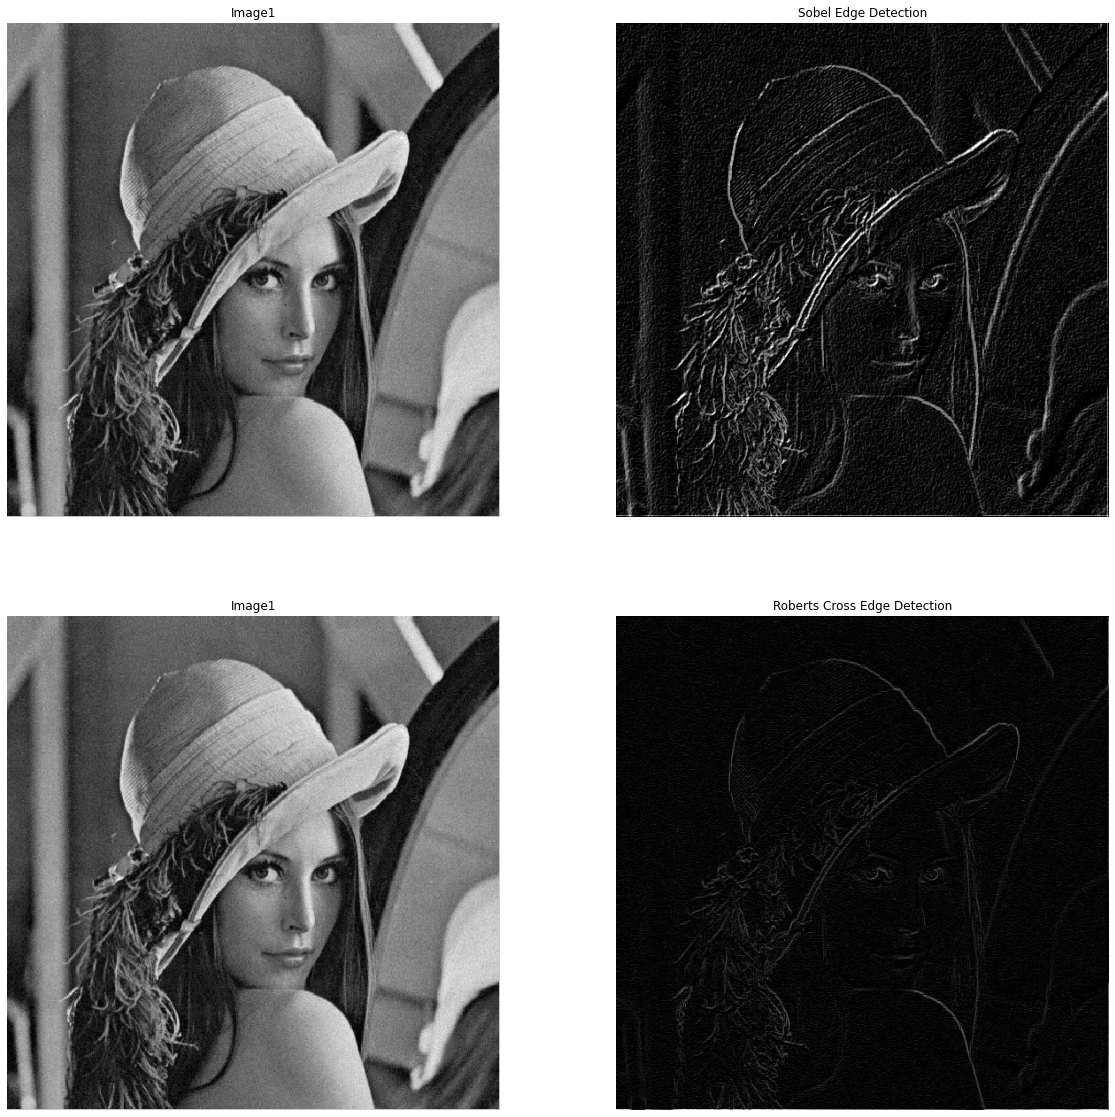

In [ ]:
#그림을 화면에 출력
plt.figure(figsize=(20,20))# 영상의 크기를 키워주자
plt.subplot(2,2,1)
plt.title("Image1")
plt.imshow(gray_img, cmap='gray')
plt.axis("off")

plt.subplot(2,2,2)
plt.title("Sobel Edge Detection")
plt.imshow(output_img, cmap='gray')
plt.axis("off")

plt.subplot(2,2,3)
plt.title("Image1")
plt.imshow(gray_img, cmap='gray')
plt.axis("off")

plt.subplot(2,2,4)
plt.title("Roberts Cross Edge Detection")
plt.imshow(output_img1, cmap='gray')
plt.axis("off")
plt.show()